In [12]:
import tensorflow as tf

def create_model(dropout_rate=0.5):
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Create the model
model = create_model()

# Display the summary of the model
model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 7200)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               921728    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                           

In [20]:
import tensorflow as tf

def create_model(dropout_rate=0.5):
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1000, activation="relu")(x)
    x = tf.keras.layers.Dense(100, activation="relu")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Create the model
model = create_model()

# Display the summary of the model
model.summary()


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 7200)              0         
                                                                 
 dense_40 (Dense)            (None, 1000)              7201000   
                                                                 
 dense_41 (Dense)            (None, 100)               100100    
                                                          

In [20]:
import tensorflow as tf
def create_model(dropout_rate=0.5):
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Create the model
model = create_model()

# Display the summary of the model
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 32, 32, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 32, 32, 3)        0         
 bda)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0   

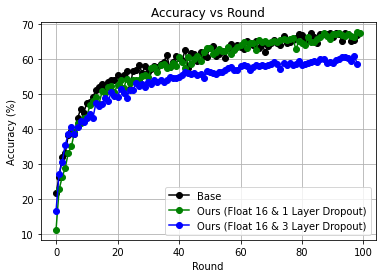

In [1]:
import json
import matplotlib.pyplot as plt

def plot_accuracy(json_data_list, labels, colors):
    for i, json_data in enumerate(json_data_list):
        # Select every 5th element of the accuracy list
        accuracies = [accuracy * 100 for j, accuracy in enumerate(json_data) if j % 5 == 0]

        # Create x-axis values (rounded values)
        rounded_values = [round(j, 2) for j in range(0, len(accuracies))]

        # Plotting with different colors and labels
        plt.plot(rounded_values, accuracies, marker='o', linestyle='-', label=labels[i], color=colors[i])

    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Round')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data from the JSON files
file_names = ['client_accuracy_base.json', 'client_accuracy_ours.json', 'client_accuracy_ours_st.json']
labels = ['Base', 'Ours (Float 16 & 1 Layer Dropout)', 'Ours (Float 16 & 3 Layer Dropout)']
colors = ['black', 'green', 'blue']

json_data_list = []

for file_name in file_names:
    with open(file_name, 'r') as f:
        json_data = json.load(f)
        json_data_list.append(json_data)

# Call the function to plot the accuracy
plot_accuracy(json_data_list, labels, colors)


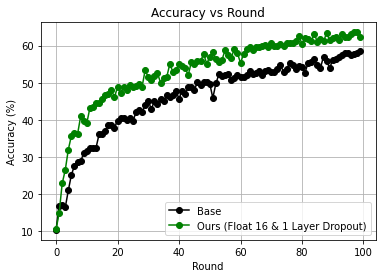

In [2]:
import json
import matplotlib.pyplot as plt

def plot_accuracy(json_data_list, labels, colors):
    for i, json_data in enumerate(json_data_list):
        # Select every 5th element of the accuracy list
        accuracies = [accuracy * 100 for j, accuracy in enumerate(json_data) if j % 5 == 0]

        # Create x-axis values (rounded values)
        rounded_values = [round(j, 2) for j in range(0, len(accuracies))]

        # Plotting with different colors and labels
        plt.plot(rounded_values, accuracies, marker='o', linestyle='-', label=labels[i], color=colors[i])

    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Round')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data from the JSON files
file_names = ['client_accuracy_imb_base.json', 'client_accuracy_imb_ours.json']
labels = ['Base',  'Ours (Float 16 & 1 Layer Dropout)']
colors = ['black', 'green']

json_data_list = []

for file_name in file_names:
    with open(file_name, 'r') as f:
        json_data = json.load(f)
        json_data_list.append(json_data)

# Call the function to plot the accuracy
plot_accuracy(json_data_list, labels, colors)


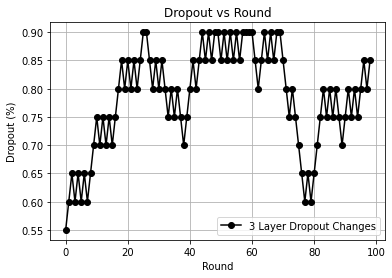

In [9]:
import json
import matplotlib.pyplot as plt

def plot_accuracy(json_data_list, labels, colors):
    for i, json_data in enumerate(json_data_list):
        # Select every 5th element of the accuracy list
        accuracies = [accuracy * 1 for j, accuracy in enumerate(json_data) if j % 1 == 0]

        # Create x-axis values (rounded values)
        rounded_values = [round(j, 2) for j in range(0, len(accuracies))]

        # Plotting with different colors and labels
        plt.plot(rounded_values, accuracies, marker='o', linestyle='-', label=labels[i], color=colors[i])

    plt.xlabel('Round')
    plt.ylabel('Dropout (%)')
    plt.title('Dropout vs Round')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data from the JSON files
file_names = [ 'dropout_rate_ours_st.json']
labels = ['3 Layer Dropout Changes']
colors = ['black']

json_data_list = []

for file_name in file_names:
    with open(file_name, 'r') as f:
        json_data = json.load(f)
        json_data_list.append(json_data)

# Call the function to plot the accuracy
plot_accuracy(json_data_list, labels, colors)


   ---------------------------------------- 0.0/43.2 kB ? eta -:--:--
   ---------------------------------------- 43.2/43.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import visualkeras
import tensorflow as tf

def create_model(dropout_rate=0.5):
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()

visualkeras.layered_view(model, scale_xy=10000, scale_z=10000, max_z=1000)
visualkeras.layered_view(model).show() # display using your system viewer

In [21]:
import visualkeras
import tensorflow as tf

def create_model(dropout_rate=0.5):
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1000, activation="relu")(x)
    x = tf.keras.layers.Dense(100, activation="relu")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()

visualkeras.layered_view(model, scale_xy=10000, scale_z=10000, max_z=1000)
visualkeras.layered_view(model).show() # display using your system viewer